<h3>  &nbsp;&nbsp;Train on GPU&nbsp;&nbsp; <a href="https://cloud.google.com/tpu/"><img valign="middle" src="https://raw.githubusercontent.com/GoogleCloudPlatform/tensorflow-without-a-phd/master/tensorflow-rl-pong/images/tpu-hexagon.png" width="50"></a></h3>

1. On the main menu, click Runtime and select **Change runtime type**. Set "GPU" as the hardware accelerator.
1. Click Runtime again and select **Runtime > Run All**. You can also run the cells manually with Shift-ENTER. 

In [1]:
import tensorflow.keras as keras
keras.__version__

'2.4.0'

In [2]:
import numpy as np
import tensorflow
import sklearn.model_selection as sk

In [3]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

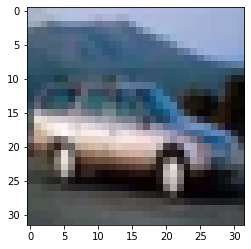

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)

plt.show()

In [5]:
# MODIFY THE CODE TO ADD A VALIDATION SET

train_images = train_images.reshape((50000, 32, 32, 3))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 32, 32, 3))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print(test_images.shape)
print(test_labels.shape)

test_images, validation_images,  test_labels, validation_labels = sk.train_test_split(test_images, test_labels, test_size=0.5)

(10000, 32, 32, 3)
(10000, 10)


In [6]:
# 3 VGG BLOCKS achieved 0.7117 acc 
# 4 VGG BLOCKS tends to overfit after 15 epoch
# adding dropout with p = 0.01 acc - 0.7112
# adding dropout with p = 0.1 overfit a little after 15 epoch, acc - 0.68
# adding dropout with p = 0.2 overfit a little after 15 epoch, acc - 0.7006 (best result 0.7162, the worst 0.6809, very dependent on the run)
# adding dropout with p=0.1, p=0.2 and p=0.3 for subsequent blocks, acc = 0.73 (best)
# decreasing batch size improved the classifier to acc - 0.772 (best) with batch as 512 
# at batch - 128 - 0.8104, using dropout subsequent dropouts (0.2,0.3,0.4)

In [7]:
  # MAKE WHATEVER CHANGES ARE NECESSARY
  # TO GET 0.7 ACCURACY ON THE TEST SET
  
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', padding="same", input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3,3), activation='relu', padding="same"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(128, (3, 3), activation='relu', padding="same"))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding="same"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.4))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

In [9]:
  # MAKE WHATEVER CHANGES ARE NECESSARY
  # TO GET 0.7 ACCURACY ON THE TEST SET

model_hist = model.fit(train_images, train_labels,
          epochs=20, batch_size=128, validation_data=(validation_images, validation_labels))
          # ADD VALIDATION HERE)

Epoch 1/20
391/391 [==============================] - 4s 9ms/step - loss: 1.8639 - accuracy: 0.3175 - val_loss: 1.4557 - val_accuracy: 0.4666
Epoch 2/20
391/391 [==============================] - 3s 9ms/step - loss: 1.4098 - accuracy: 0.4904 - val_loss: 1.2545 - val_accuracy: 0.5588
Epoch 3/20
391/391 [==============================] - 3s 9ms/step - loss: 1.1709 - accuracy: 0.5820 - val_loss: 1.1100 - val_accuracy: 0.6090
Epoch 4/20
391/391 [==============================] - 4s 10ms/step - loss: 1.0093 - accuracy: 0.6454 - val_loss: 0.9971 - val_accuracy: 0.6520
Epoch 5/20
391/391 [==============================] - 4s 9ms/step - loss: 0.8944 - accuracy: 0.6846 - val_loss: 0.8230 - val_accuracy: 0.7100
Epoch 6/20
391/391 [==============================] - 4s 9ms/step - loss: 0.8024 - accuracy: 0.7190 - val_loss: 0.7782 - val_accuracy: 0.7258
Epoch 7/20
391/391 [==============================] - 3s 9ms/step - loss: 0.7436 - accuracy: 0.7386 - val_loss: 0.7847 - val_accuracy: 0.7342
Epoch

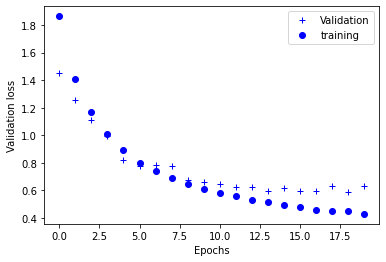

In [10]:
import matplotlib.pyplot as plt

epochs = range(0, 20)
train_loss = model_hist.history['loss']
val_loss= model_hist.history['val_loss']

plt.plot(epochs, val_loss, 'b+', label='Validation')
plt.plot(epochs, train_loss, 'bo', label='training')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.savefig('best.png')
plt.show()


In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)
test_loss

157/157 [==============================] - 0s 1ms/step - loss: 0.6107 - accuracy: 0.8168
test_acc: 0.8167999982833862


0.6106910705566406

In [12]:
model.save_weights('./cifar10.h5', overwrite=True)